In [7]:
import seaborn as sns
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import missingno as msno
from numpy import nansum
from numpy import nanmean
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [8]:
main = pd.read_csv("main.csv")
mainByMonth = pd.read_csv("mainByMonth.csv")
mainByYear = pd.read_csv("mainByYear.csv")


In [9]:
df_copy=main.copy() #[main['Date']>'01-01-2000']
df_copy["status"] = df_copy["rain_mm"]>30#df_copy["rain_mm"].mean()
df_copy= df_copy.drop(['rain_yesterday_mm','Change_from_last_day','stations','rain_mm','Date','KinneretInPrecent','year','day','rain_day','Kinneret_Level','rpr_hail','rpr_snow','rpr_frost','rpr_fog','rpr_thunder','rpr_lightening','rpr_sand_storm','rpr_gale'],axis=1)#,'stn_num'
#'rpr_mist''rpr_dew',
df_copy=df_copy.dropna()
df_copy

,tmp_air_max,tmp_air_min,sns_drt,month,rain_yesterday,status
0,15.626471,7.529412,174.0,2,1.0,True
1,14.976471,6.632353,219.0,2,1.0,True
2,13.161765,8.338235,36.0,2,1.0,True
3,16.079412,6.147059,417.0,2,1.0,False
4,15.761765,6.955882,135.0,2,1.0,False
...,...,...,...,...,...,...
17535,18.039535,10.588372,530.0,12,0.0,False
17536,16.835714,9.772093,500.0,12,0.0,False
17537,18.874419,9.986047,530.0,12,0.0,False
17538,19.781395,10.218605,510.0,12,0.0,False


In [10]:
TRAINING_FEATURES = df_copy.columns[df_copy.columns != 'status']
TARGET_FEATURE    = 'status'
X = df_copy[TRAINING_FEATURES]
y = df_copy[TARGET_FEATURE]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)
clf_model = LogisticRegression().fit(X_train, y_train)
y_pred=clf_model.predict(X_test)
resDF=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
resDF["correct"]=abs((resDF["Actual"]^resDF["Predicted"])-1)


print("correct:",resDF[resDF["correct"]==1].shape[0])
print("uncorrect:",resDF[resDF["correct"]==0].shape[0])
print("Accuracy of the model: "+ str(accuracy_score(y_test, y_pred)*100) + "%")



correct: 7940
uncorrect: 830
Accuracy of the model: 90.53591790193842%


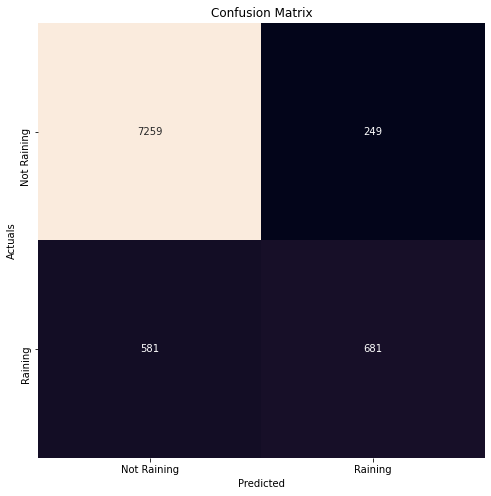

In [11]:
cm = confusion_matrix(y_test, y_pred)
# print(cm)
plt.figure(figsize = (8,8))
sns.heatmap(cm,fmt="d",annot=True,xticklabels=["Not Raining","Raining"],yticklabels=["Not Raining","Raining"],cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()

In [ ]:
# print ('הכנס טמפרטורה מקסימלית החודשי')
tmp_air_max = input('> ')
print ('הכנס טמפרטורה מינימלית החודשי')
tmp_air_min = input('> ')
print ('הכנס את ממוצע זמן זהירת השמש החודשי')
sns_drt = input('> ')
print ('הכנס מספר חודש')
month = input('> ')
print ('בחר 1 אם ירד גשם אתמול, אחרת בחר 0')
rain_yesterday = input('> ')
df_empty = X[0:0]
df_empty.loc[-1]= ([tmp_air_max,tmp_air_min,sns_drt,month,rain_yesterday])

#df_empty
#df_empty.loc[-1]= ([20.0,1.0,1.0,1.0,1.0])
y_pred=clf_model.predict(df_empty)
print
if y_pred==True:
    print("It is expected to rain today")
else:
    print("It is not expected to rain today")
print("Probability",clf_model.predict_proba(df_empty)[0][1])

In [14]:
lr_rain = linear_model.LinearRegression() # create a linear regression object

# scikit-learn doesn't work as well with pandas, so we have to extract values 
x = mainByMonth['rain_mm'].values.reshape(mainByMonth['rain_mm'].shape[0],1)
y = mainByMonth['Change_from_last_month'].values.reshape(mainByMonth['Change_from_last_month'].shape[0],1)

lr_rain.fit(X=x, y=y)

print("Slope:",lr_rain.coef_)
print("Intercept:",lr_rain.intercept_)
print("R2:",lr_rain.score(x,y))

Slope: [[0.00032886]]
Intercept: [-0.18342576]
R2: 0.5039885536694081


In [15]:
lr_raindays = linear_model.LinearRegression() # create a linear regression object

# scikit-learn doesn't work as well with pandas, so we have to extract values 
x = mainByMonth['rain_day'].values.reshape(mainByMonth['rain_day'].shape[0],1)
y = mainByMonth['Change_from_last_month'].values.reshape(mainByMonth['Change_from_last_month'].shape[0],1)

lr_raindays.fit(X=x, y=y)

print("Slope:",lr_raindays.coef_)
print("Intercept:",lr_raindays.intercept_)
print("R2:",lr_raindays.score(x,y))

Slope: [[0.0267411]]
Intercept: [-0.30007933]
R2: 0.49236087725915334


In [16]:
lr_temp = linear_model.LinearRegression() # create a linear regression object

# scikit-learn doesn't work as well with pandas, so we have to extract values 
x = mainByMonth['tmp_air_min'].values.reshape(mainByMonth['tmp_air_min'].shape[0],1)
y = mainByMonth['Change_from_last_month'].values.reshape(mainByMonth['Change_from_last_month'].shape[0],1)

lr_temp.fit(X=x, y=y)
print("Slope:",lr_temp.coef_)
print("Intercept:",lr_temp.intercept_)
print("R2:",lr_temp.score(x,y))

Slope: [[-0.04833561]]
Intercept: [0.67997264]
R2: 0.5539465407851284


In [17]:
lr_sns = linear_model.LinearRegression() # create a linear regression object

# scikit-learn doesn't work as well with pandas, so we have to extract values 
x = mainByMonth[(mainByMonth['sns_drt']>0)]['sns_drt'].values.reshape(mainByMonth[(mainByMonth['sns_drt']>0)]['sns_drt'].shape[0],1)
y = mainByMonth[(mainByMonth['sns_drt']>0)]['Change_from_last_month'].values.reshape(mainByMonth[(mainByMonth['sns_drt']>0)]['Change_from_last_month'].shape[0],1)

lr_sns.fit(X=x, y=y)
print("Slope:",lr_sns.coef_)
print("Intercept:",lr_sns.intercept_)
print("R2:",lr_sns.score(x,y))

Slope: [[-0.00156951]]
Intercept: [0.82798121]
R2: 0.4696008921645629


(-1.5, 1.5)

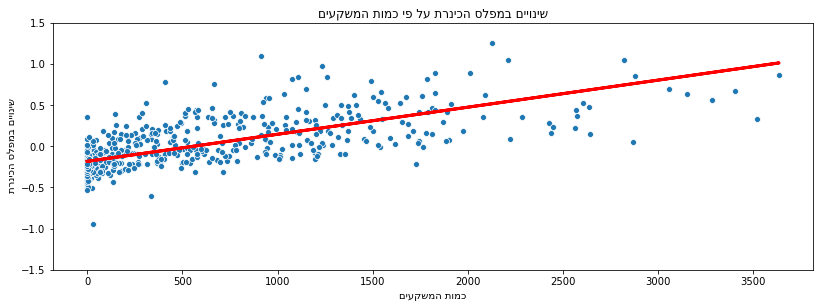

In [18]:
plt.figure(2,figsize=[30,10])
plt.subplot(2,2,1)
sns.scatterplot(data=mainByMonth, x=mainByMonth['rain_mm'],y=mainByMonth['Change_from_last_month'])
plt.plot(mainByMonth['rain_mm'],lr_rain.predict(mainByMonth['rain_mm'].values.reshape(mainByMonth['rain_mm'].shape[0],1)),c='r',linewidth=3)
plt.title("םיעקשמה תומכ יפ לע תרניכה סלפמב םייוניש")
plt.xlabel("םיעקשמה תומכ")
plt.ylabel(" תרניכה סלפמב םייוניש")
plt.ylim([-1.5,1.5])

(-1.5, 1.5)

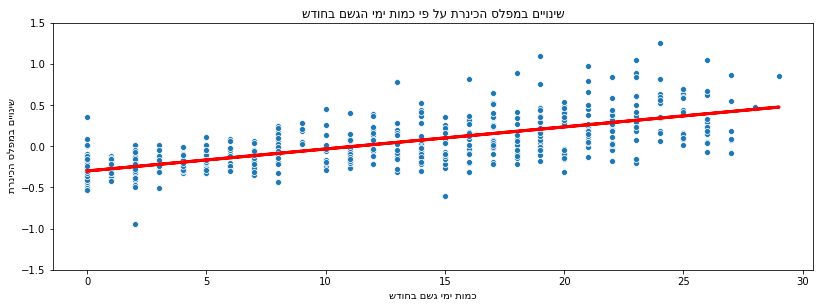

In [19]:
plt.figure(2,figsize=[30,10])
plt.subplot(2,2,1)
sns.scatterplot(data=mainByMonth, x=mainByMonth['rain_day'],y=mainByMonth['Change_from_last_month'])
plt.plot(mainByMonth['rain_day'],lr_raindays.predict(mainByMonth['rain_day'].values.reshape(mainByMonth['rain_day'].shape[0],1)),c='r',linewidth=3)
plt.title("שדוחב םשגה ימי תומכ יפ לע תרניכה סלפמב םייוניש")
plt.xlabel("שדוחב םשג ימי תומכ")
plt.ylabel(" תרניכה סלפמב םייוניש")
plt.ylim([-1.5,1.5])

(-1.5, 1.5)

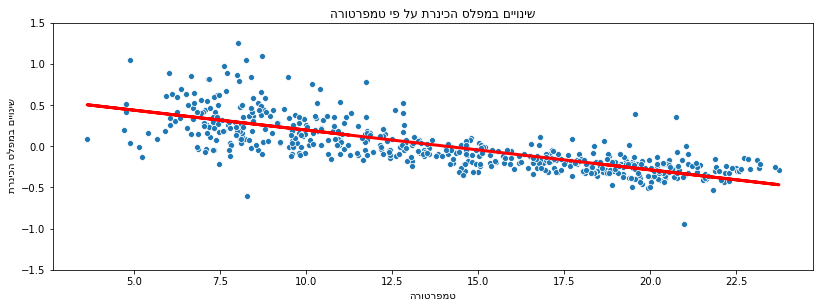

In [20]:
plt.figure(2,figsize=[30,10])
plt.subplot(2,2,1)
sns.scatterplot(data=mainByMonth, x=mainByMonth['tmp_air_min'],y=mainByMonth['Change_from_last_month'])
plt.plot(mainByMonth['tmp_air_min'],lr_temp.predict(mainByMonth['tmp_air_min'].values.reshape(mainByMonth['tmp_air_min'].shape[0],1)),c='r',linewidth=3)
plt.title("הרוטרפמט יפ לע תרניכה סלפמב םייוניש")
plt.xlabel("הרוטרפמט")
plt.ylabel(" תרניכה סלפמב םייוניש")
plt.ylim([-1.5,1.5])

(-1.5, 1.5)

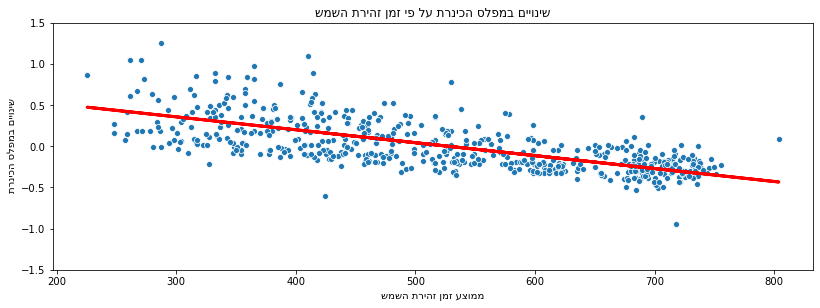

In [21]:
plt.figure(2,figsize=[30,10])
plt.subplot(2,2,1)
sns.scatterplot(data=mainByMonth, x=mainByMonth['sns_drt'],y=mainByMonth['Change_from_last_month'])
plt.plot(mainByMonth['sns_drt'],lr_sns.predict(mainByMonth['sns_drt'].values.reshape(mainByMonth['sns_drt'].shape[0],1)),c='r',linewidth=3)
plt.title("שמשה תריהז ןמז יפ לע תרניכה סלפמב םייוניש")
plt.xlabel("שמשה תריהז ןמז עצוממ")
plt.ylabel(" תרניכה סלפמב םייוניש")
plt.ylim([-1.5,1.5])

Slope: [ 0.00019293  0.00151137 -0.01972791  0.01157605 -0.03464529 -0.00044647]
Intercept: 0.323948077991104
R2: 0.7026334213842689


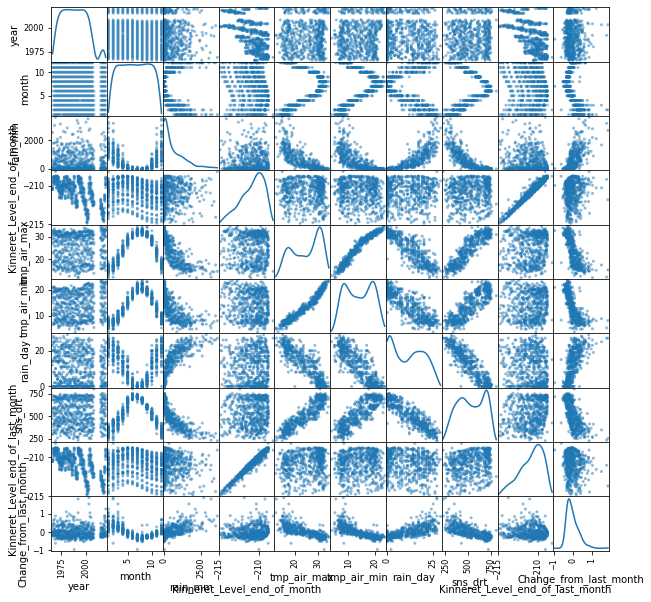

In [22]:
lr = linear_model.LinearRegression() # create a linear regression object

x = mainByMonth[['rain_mm',"rain_day","tmp_air_min","tmp_air_max","month","sns_drt"]]
y = mainByMonth['Change_from_last_month']
lr.fit(X=x, y=y);
x
print("Slope:",lr.coef_)
print("Intercept:",lr.intercept_)
print("R2:",lr.score(x,y))
#print("R2:",lr.r2_score(y,lr.predict(x.values)))

#print(mainByMonth.corr())
pd.plotting.scatter_matrix(mainByMonth, figsize=(10, 10), diagonal='kde')
plt.show()

In [25]:
# print ('הכנס את כמות המשקעים החודשית')
rain = input('> ')
print ('הכנס את מספר ימי הגשם בחודש')
raindays = input('> ')
print ('הכנס טמפרטורה מינימלית החודשי')
tmp_air_min = input('> ')
print ('הכנס טמפרטורה מקסימלית החודשי')
tmp_air_max = input('> ')
print ('הכנס מספר חודש')
month = input('> ')
print ('הכנס את ממוצע זמן זהירת השמש החודשי')
sns_drt = input('> ')

df_empty = x[0:0] 
df_empty.loc[0]= (rain,raindays,tmp_air_min,tmp_air_max,month,sns_drt)
print("מפלס הכנרת יעלה ב:",lr.predict(df_empty.values))

>  1


הכנס את מספר ימי הגשם בחודש


>  1


הכנס טמפרטורה מינימלית החודשי


>  1


הכנס טמפרטורה מקסימלית החודשי


>  1


הכנס מספר חודש


>  1


הכנס את ממוצע זמן זהירת השמש החודשי


>  1


מפלס הכנרת יעלה ב: [0.28240875]


C:\Users\RonHadad\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
